In [1]:
# Intialize the tensorflow-gpu <-> physical matching

import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

1 Physical GPUs, 1 Logical GPUs


In [2]:
from load.load_data import load_opendata
from load.load_data import load_mydata

import matplotlib.pyplot as plt
%matplotlib inline
import random

In [3]:
myloader = load_mydata()
X_my, Y_my = myloader.load_data(classifier_label="Belt", dsize=(128,128), comp_ratio=4)

openloader = load_opendata()
X_open, Y_open = openloader.load_data(classifier_label="Belt", dsize=(128,128), comp_ratio=20)

X_my_test, Y_my_test = myloader.load_test_data(classifier_label="Belt", dsize=(128,128), comp_ratio=4)

print("My data is ", len(Y_my), ", Open data is ", len(Y_open), ",  My Test set is ", len(Y_my_test))

My data folder lists are..
20211012_center_belt_nomask_minseok1
20211012_center_unbelt_nomask_minseok1
20211015_center_belt_mask_yukhyun1
20211015_center_unbelt_mask_sungwook1
20211015_center_unbelt_mask_yukhyun1
20211015_center_unbelt_nomask_sungwook1
20211015_center_unbelt_nomask_sungwook2
20211015_center_unbelt_nomask_yukhyun1
20211015_close_unbelt_nomask_sungwook1
20211017_center_belt_mask_yukhyun1
20211017_center_belt_nomask_yukhyun1
20211017_center_unbelt_mask_sungwook1
20211017_center_unbelt_nomask_sungwook1
20211019_center_belt_mask_juwon1
20211019_center_belt_mask_juwon2
20211019_center_belt_mask_juwon3
20211019_center_belt_nomask_juwon1
20211019_center_belt_nomask_juwon2
20211019_center_unbelt_mask_juwon3
20211019_center_unbelt_nomask_juwon1
20211019_close_belt_mask_juwon1
20211019_close_unbelt_mask_juwon1
20211019_far_belt_mask_juwon1
20211019_far_unbelt_mask_juwon1
20211019_phone_belt_mask_juwon1
20211019_phone_unbelt_mask_juwon1
20211020_behind_belt_mask_sujin1
20211020_be

My data Loading with Belt: 24024it [00:44, 539.58it/s]
Train_data with Label(Belt): 100%|██████████| 22424/22424 [00:06<00:00, 3530.30it/s]


Test data folder lists are..
20211012_center_belt_nomask_minseok1
20211012_center_unbelt_nomask_minseok1
20211015_center_belt_mask_yukhyun1
20211015_center_unbelt_mask_sungwook1
20211015_center_unbelt_mask_yukhyun1
20211015_center_unbelt_nomask_sungwook1
20211015_center_unbelt_nomask_sungwook2
20211015_center_unbelt_nomask_yukhyun1
20211015_close_unbelt_nomask_sungwook1
20211017_center_belt_mask_yukhyun1
20211017_center_belt_nomask_yukhyun1
20211017_center_unbelt_mask_sungwook1
20211017_center_unbelt_nomask_sungwook1
20211019_center_belt_mask_juwon1
20211019_center_belt_mask_juwon2
20211019_center_belt_mask_juwon3
20211019_center_belt_nomask_juwon1
20211019_center_belt_nomask_juwon2
20211019_center_unbelt_mask_juwon3
20211019_center_unbelt_nomask_juwon1
20211019_close_belt_mask_juwon1
20211019_close_unbelt_mask_juwon1
20211019_far_belt_mask_juwon1
20211019_far_unbelt_mask_juwon1
20211019_phone_belt_mask_juwon1
20211019_phone_unbelt_mask_juwon1
20211020_center_belt_mask_sujin1
20211020_

Test data Loading with Belt: 1500it [00:02, 549.72it/s]

My data is  6029 , Open data is  1122 ,  My Test set is  387


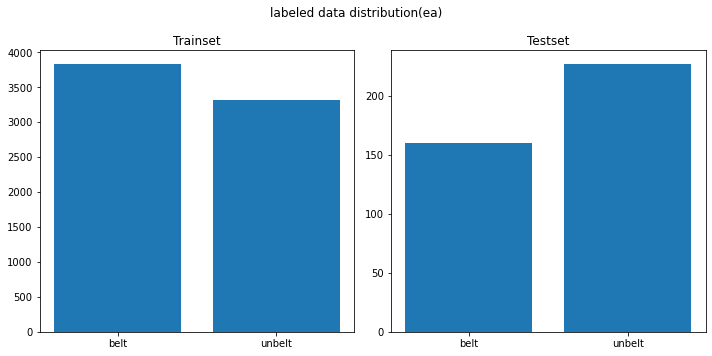

In [4]:
count_belt =0
count_unbelt =0

for idx, i in enumerate(Y_my):
    if ( i == 'b0'):
        count_belt +=1
    elif ( i == 'b1'):
        count_unbelt+=1


#벨트(b0: 0), 노벨트(b1: 1)
for idx, i in enumerate(Y_open):
    if (i =='b0'):
        count_belt+=1
    elif (i=='b1'):
        count_unbelt+=1

count_test_belt =0
count_test_unbelt =0

for idx, i in enumerate(Y_my_test):
    if ( i == 'b0'):
        count_test_belt +=1
    elif ( i == 'b1'):
        count_test_unbelt+=1

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
plt.suptitle('labeled data distribution(ea)')
ax1.set_title('Trainset')
ax1.bar(['belt','unbelt'],[count_belt, count_unbelt])

ax2.set_title('Testset')
ax2.bar(['belt','unbelt'],[count_test_belt, count_test_unbelt])

plt.tight_layout()

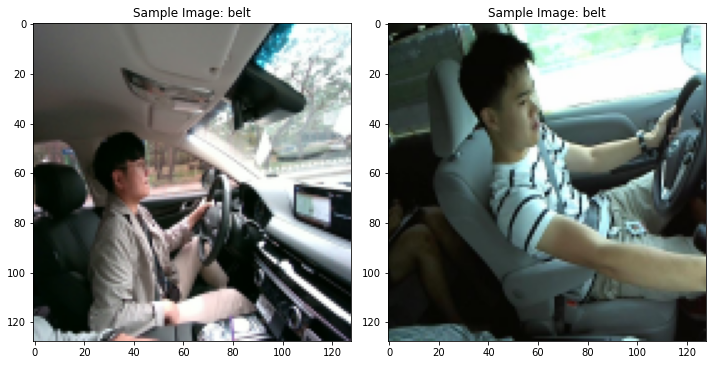

In [5]:
pick_rand1 = random.randint(0, len(X_my)-1)
pick_rand2 = random.randint(0, len(X_open)-1)


fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,5))

ax1.imshow(X_my[pick_rand1])
if (Y_my[pick_rand1] == 'b0'):
    ax1.set_title('Sample Image: belt')
elif (Y_my[pick_rand1] == 'b1'):
    ax1.set_title('Sample Image: unbelt')

ax2.imshow(X_open[pick_rand2])
if (Y_open[pick_rand2] == 'b0'):
    ax2.set_title('Sample Image: belt')
elif (Y_open[pick_rand2] == 'b1'):
    ax2.set_title('Sample Image: unbelt')

plt.tight_layout()

In [6]:
import numpy as np

X = np.concatenate((np.array(X_my), np.array(X_open)))
Y = np.concatenate((np.array(Y_my), np.array(Y_open)))

labels_list = list(set(Y))
labels_map = dict()
for idx, dat in enumerate(labels_list):
    labels_map[dat] = idx

#벨트(b0: 0), 노벨트(b1: 1)
#to numerical labels
print("Before numerical mapping: ", Y[0], Y[-1])
Y = np.array(list(map(lambda x: labels_map[x], Y)))
print("After numerical mapping: ", Y[0], Y[-1])

print("My data shape is ", X.shape)
print("Test data shape is ", np.array(X_my_test).shape)

Before numerical mapping:  b0 b0
After numerical mapping:  0 0
My data shape is  (7151, 128, 128, 3)
Test data shape is  (387, 128, 128, 3)


In [7]:
print(labels_map)

{'b0': 0, 'b1': 1}


In [8]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import random_rotation, random_shift, random_zoom

# Data Augmentation (5%*3=15%)
aug_X = []
aug_Y = []
for i in range(int(0.05*len(X))):
    data_aug_idx = random.randrange(0, len(X)-1)
    img=random_rotation(X[data_aug_idx], rg=80, row_axis=0, col_axis=1, channel_axis=2)
    aug_X.append(img)
    aug_Y.append(Y[data_aug_idx])

    data_aug_idx = random.randrange(0, len(X)-1)
    img=random_shift(X[data_aug_idx], wrg=0.1, hrg=0.1, row_axis=0, col_axis=1, channel_axis=2)
    aug_X.append(img)
    aug_Y.append(Y[data_aug_idx])

    data_aug_idx = random.randrange(0, len(X)-1)
    img=random_zoom(X[data_aug_idx], zoom_range=[0.6,0.9], row_axis=0, col_axis=1, channel_axis=2)
    aug_X.append(img)
    aug_Y.append(Y[data_aug_idx])


X = np.concatenate((X, np.array(aug_X)))
Y = np.concatenate((Y, np.array(aug_Y)))
print("Image samples with augmentation are" ,len(Y))

# Shuffled Image
temp_pool = list(zip(X,Y))
random.shuffle(temp_pool)

X, Y = zip(*temp_pool)


# Normalized Image
X = np.array(X)/255.0
print("Before one-hot encoding: ", Y[0], Y[-1])
Y = to_categorical(np.array(Y))
print("After one-hot encoding: ", Y[0], Y[-1])

print(X.shape)
print(Y.shape)


X_test = np.array(X_my_test)/255.0

Y_my_test = np.array(list(map(lambda x: labels_map[x], Y_my_test)))
Y_test = to_categorical(np.array(Y_my_test))

Image samples with augmentation are 8222
Before one-hot encoding:  1 1
After one-hot encoding:  [0. 1.] [0. 1.]
(8222, 128, 128, 3)
(8222, 2)


In [9]:
# Train, Val, Test Split
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, stratify=Y) 

In [10]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(6577, 128, 128, 3)
(1645, 128, 128, 3)
(387, 128, 128, 3)


In [11]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping, ModelCheckpoint
from model.model_cnn import model_cnn
import tensorflow as tf
import os

def scheduler(epoch, lr):
    if epoch in [7,9,12,20]:
        lr = 0.1*lr
    return lr
    
model = model_cnn(input_shape = (128, 128, 3), classifier="Belt", base_trainable = True)

adam = Adam(learning_rate=0.001)
ls_callback = LearningRateScheduler(scheduler)
es_callback = EarlyStopping(monitor='val_acc', patience=3)
filepath = os.path.join(os.getcwd(), "ckpt/", "Belt-{epoch:01d}-{val_acc:.2f}.h5")
checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

model.compile(loss='categorical_crossentropy', optimizer = adam, metrics=['acc',tf.keras.metrics.TruePositives(),tf.keras.metrics.TrueNegatives(), tf.keras.metrics.AUC(thresholds=[0.5,0.7,0.9,0.95]) ])

In [12]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
1st_conv (Conv2D)            (None, 128, 128, 64)      4864      
_________________________________________________________________
1st_relu (ReLU)              (None, 128, 128, 64)      0         
_________________________________________________________________
1st_maxpool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
2nd_conv (Conv2D)            (None, 64, 64, 128)       204928    
_________________________________________________________________
2nd_relu (ReLU)              (None, 64, 64, 128)       0         
_________________________________________________________________
2nd_maxpool (MaxPooling2D)   (None, 32, 32, 128)       0     

In [13]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, shuffle=True, validation_data=[X_val, y_val], callbacks=[ls_callback, es_callback, checkpoint])

Train on 6577 samples, validate on 1645 samples
Epoch 1/10
6560/6577 [============================>.] - ETA: 1s - loss: 0.5752 - acc: 0.8127 - true_positives: 5331.0000 - true_negatives: 5331.0000 - auc: 0.8572
Epoch 00001: val_acc improved from -inf to 0.88389, saving model to /home/joker1251/Desktop/owen/DataAnalysis_Science/DS_Master_21/Project/ckpt/Belt-1-0.88.h5
6577/6577 [==============================] - 591s 90ms/sample - loss: 0.5739 - acc: 0.8130 - true_positives: 5347.0000 - true_negatives: 5347.0000 - auc: 0.8575 - val_loss: 0.2357 - val_acc: 0.8839 - val_true_positives: 1454.0000 - val_true_negatives: 1454.0000 - val_auc: 0.9231
Epoch 2/10
6560/6577 [============================>.] - ETA: 1s - loss: 0.1646 - acc: 0.9288 - true_positives: 6093.0000 - true_negatives: 6093.0000 - auc: 0.9545
Epoch 00002: val_acc improved from 0.88389 to 0.93435, saving model to /home/joker1251/Desktop/owen/DataAnalysis_Science/DS_Master_21/Project/ckpt/Belt-2-0.93.h5
6577/6577 [==============

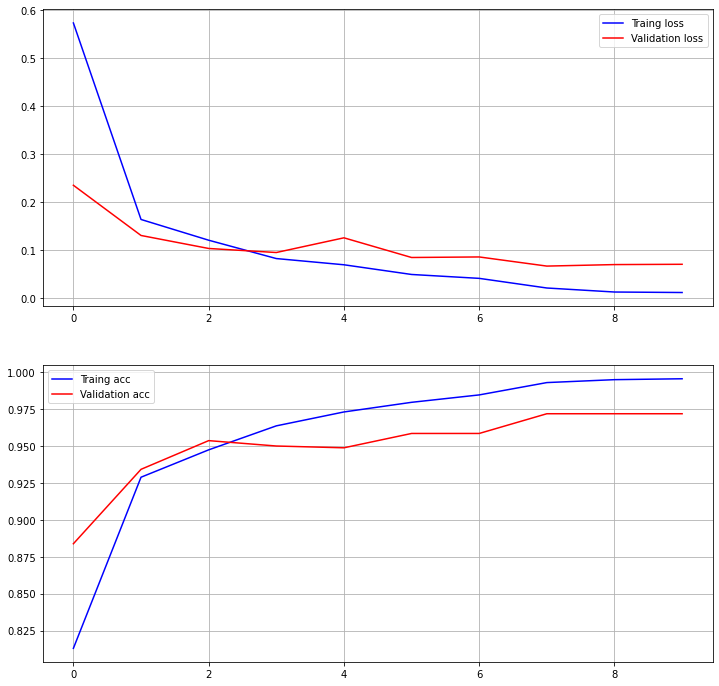

In [14]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,12))
ax1.plot(history.history['loss'], color='b', label='Traing loss')
ax1.plot(history.history['val_loss'], color='r', label='Validation loss')
ax1.legend()
ax1.grid()

ax2.plot(history.history['acc'], color='b', label='Traing acc')
ax2.plot(history.history['val_acc'], color='r', label='Validation acc')
ax2.legend()
ax2.grid()


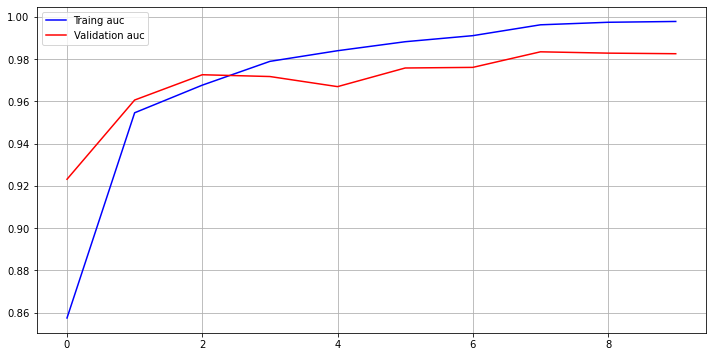

In [15]:
fig, (ax1) = plt.subplots(1,1, figsize=(12,6))
ax1.plot(history.history['auc'], color='b', label='Traing auc')
ax1.plot(history.history['val_auc'], color='r', label='Validation auc')
ax1.legend()
ax1.grid()


In [16]:
# Test using X_test data

X_pred=model.predict(X_test)
def score(preds, labels):
    ret=0
    for pred, label in zip(preds, labels):

        pred_idx = np.argmax(pred)
        label_idx = np.argmax(label)

        if (pred_idx == label_idx):
            ret+=1

    ret = ret / len(preds)
    return ret

print("Test Predict is: {}%".format(score(X_pred, Y_test)*100))


Test Predict is: 100.0%


In [17]:
def matching_plot(x, pred, label,  ax, thd=0.5):
    box1 = {'boxstyle': 'round',
        'ec': (0.0, 0.0, 0.0),
        'fc': (1.0, 1.0, 1.0)}

    pick = random.randint(0, len(x)-1)
    ax.imshow(x[pick])

    pred_idx = np.argmax(pred[pick])
    label_idx = np.argmax(label[pick])

    if pred[pick][pred_idx] > thd:
        p = 1
    else:
        p = 0

    if (label_idx == pred_idx):
        if (p == 1):
            ax.set_title("Predicted with high confidence as {:.2f}".format((pred[pick][pred_idx])))
        elif (p ==0):
            ax.set_title("Predicted with low  confidence as {:.2f}".format((pred[pick][pred_idx])))


        for key, val in labels_map.items():
            if (pred_idx == val):
                if key == 'b0':
                    tit = "Belt"
                elif key == 'b1':
                    tit = "Nobelt"
                ax.text(10,10, tit, bbox=box1, fontsize=15)
    else:
        ax.set_title("Wrong Predicted")    
        ax.text(10,10,"Fail", bbox=box1, fontsize=15)    

#벨트(b0: 0), 노벨트(b1: 1)

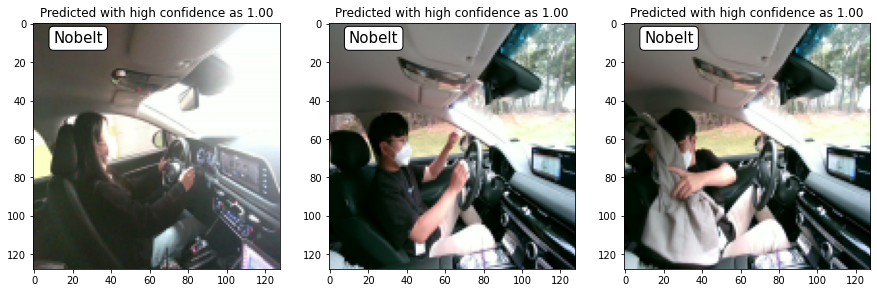

In [24]:
fig, ax = plt.subplots(1, 3, figsize = (15,5))
for i in range(3):
    matching_plot(X_test, X_pred, Y_test, ax[i], thd=0.8)
plt.show()

In [25]:
import utils.xai_viz
from utils.xai_viz import explainable_model
import importlib
importlib.reload(utils.xai_viz)

xai = explainable_model(model)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
1st_conv (Conv2D)            (None, 128, 128, 64)      4864      
_________________________________________________________________
1st_relu (ReLU)              (None, 128, 128, 64)      0         
_________________________________________________________________
1st_maxpool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
2nd_conv (Conv2D)            (None, 64, 64, 128)       204928    
_________________________________________________________________
2nd_relu (ReLU)              (None, 64, 64, 128)       0         
_________________________________________________________________
2nd_maxpool (MaxPooling2D)   (None, 32, 32, 128)       0     

{'b0': 0, 'b1': 1}


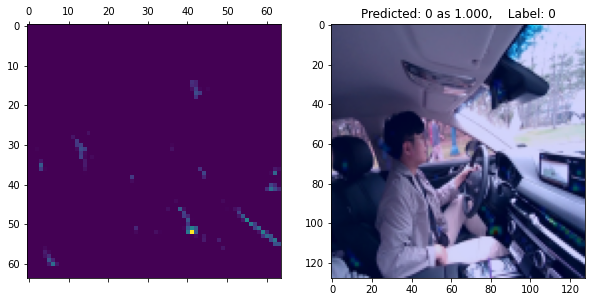

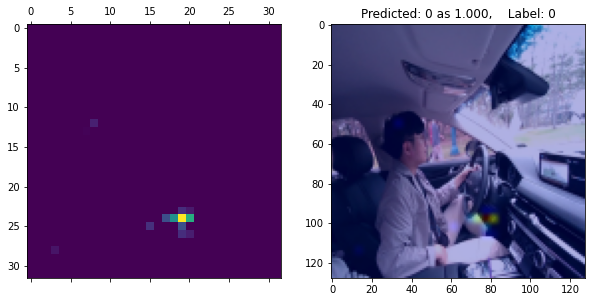

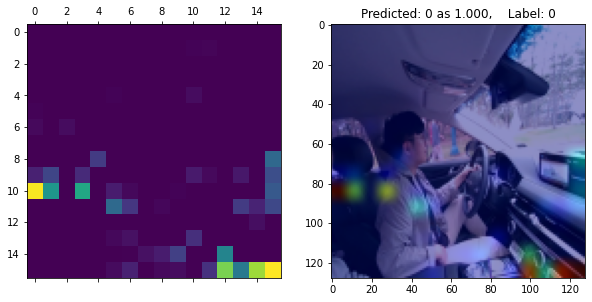

In [56]:
pick = random.randint(0, len(X_test)-1)
heatmap = xai.explainable_model(X_test[pick], "2nd_relu", alpha=0.4)

fig_title = "Predicted: {} as {:.3f}".format(np.argmax(X_pred[pick]), X_pred[pick][np.argmax(X_pred[pick])])  +   ",    Label: {}".format(np.argmax(Y_test[pick]))  
plt.title(fig_title)

heatmap = xai.explainable_model(X_test[pick], "3rd_conv", alpha=0.6)
fig_title = "Predicted: {} as {:.3f}".format(np.argmax(X_pred[pick]), X_pred[pick][np.argmax(X_pred[pick])])  +   ",    Label: {}".format(np.argmax(Y_test[pick]))  


plt.title(fig_title)
heatmap = xai.explainable_model(X_test[pick], "3rd_maxpool", alpha=0.8)
fig_title = "Predicted: {} as {:.3f}".format(np.argmax(X_pred[pick]), X_pred[pick][np.argmax(X_pred[pick])])  +   ",    Label: {}".format(np.argmax(Y_test[pick]))  

plt.title(fig_title)

print(labels_map)


In [30]:
# Save Model
model.save('./ckpt/model_belt_cnn')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: ./ckpt/model_belt_cnn/assets


In [31]:
# Load Model (Test)
from tensorflow.keras.models import load_model
model_load = load_model("./ckpt/model_belt_cnn")